# Praca domowa nr 4 - Generator autorskich zbiorów benchmarkowych

### Wojciech Celej

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use("seaborn-whitegrid")
sns.set_context("notebook", font_scale=1.2)

---

## 1. Zbiór

In [3]:
def R(theta):
    theta = np.radians(theta)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    return R

In [4]:
t = np.linspace(0, 2*np.pi, 80, endpoint=False)
x = 16*np.sin(t)**3
y = 13*np.cos(t) - 5*np.cos(2*t) - 2*np.cos(3*t) - np.cos(4*t) + 17
w1 = R(20) @ np.array([x, y])
w1[0, :] -= 12
w1[1, :] += 18
w1 = np.insert(w1, 2, 1, axis=0)
w2 = R(-20) @ np.array([x, y])
w2[0, :] += 12
w2[1, :] += 18
w2 = np.insert(w2, 2, 2, axis=0)
w3 = np.array([x, y]) * 3.5
w3[1, :] -= 20
w3 = np.insert(w3, 2, 3, axis=0)
w = np.concatenate((w1, w2, w3), axis=1)

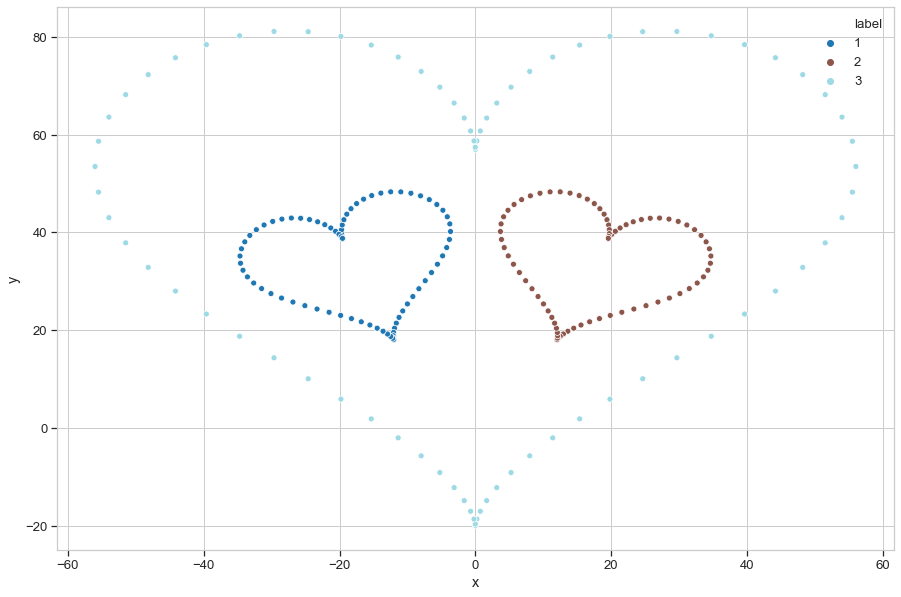

In [5]:
d = {"x": w[0, :], "y": w[1, :], "label": w[2, :].astype(np.int32)}
df1 = pd.DataFrame(data=d)
sns.scatterplot(data=df1, x="x", y="y", hue="label", legend="full", palette="tab20")
plt.show()

---

## 2. Zbiór

In [6]:
x = np.linspace(-0.75*np.pi, np.pi/4, 250)
y1 = np.random.normal(np.sin(x), 0.03) - 0.2
y1 = np.expand_dims(y1, axis=1)
y1 = np.insert(y1, 1, 1, axis=1)
y1 = np.insert(y1, 0, x, axis=1)
y2 = np.random.normal(np.cos(x), 0.04)
y2 = np.expand_dims(y2, axis=1)
y2 = np.insert(y2, 1, 2, axis=1)
y2 = np.insert(y2, 0, x, axis=1)
w = np.concatenate((y1, y2), axis=0)

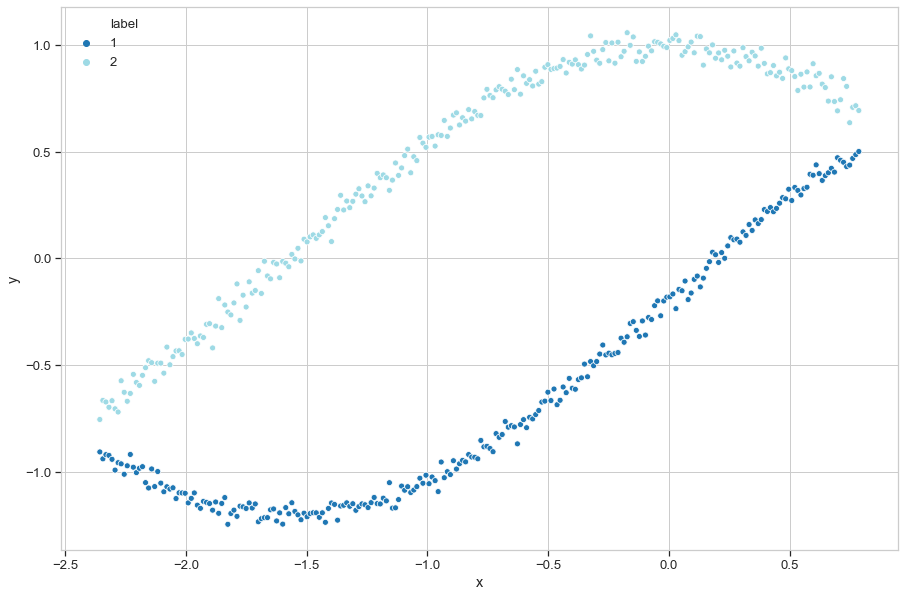

In [7]:
d = {"x": w[:, 0], "y": w[:, 1], "label": w[:, 2].astype(np.int32)}
df2 = pd.DataFrame(data=d)
sns.scatterplot(data=df2, x="x", y="y", hue="label", legend="full", palette="tab20")
plt.show()

---

## 3. Zbiór

In [8]:
P1 = [3, 5]
P2 = [0, 1]
P3 = [-1.5, 5]
size = 200
a = np.ndarray((3*size, 3), dtype=np.float32)
for i in range(size):
    r = 2
    x1 = P1[0] + np.random.uniform(-r, r)
    y1 = P1[1] + np.random.uniform(-r, r)
    radius = np.random.uniform(0, r)
    theta = np.random.uniform(0, 2*np.pi)
    x2 = P2[0] + radius * np.cos(theta)
    y2 = P2[1] + radius * np.sin(theta)
    x3 = np.random.normal(P3[0], 0.5*np.sqrt(r))
    y3 = np.random.normal(P3[1], 0.5*np.sqrt(r))
    a[i*3, :] = [x1, y1, 1]
    a[i*3+1, :] = [x2, y2, 2]
    a[i*3+2, :] = [x3, y3, 3]

In [9]:
d = {"x": a[:, 0], "y": a[:, 1], "label": a[:, 2].astype(np.int32)}
df3 = pd.DataFrame(data=d)

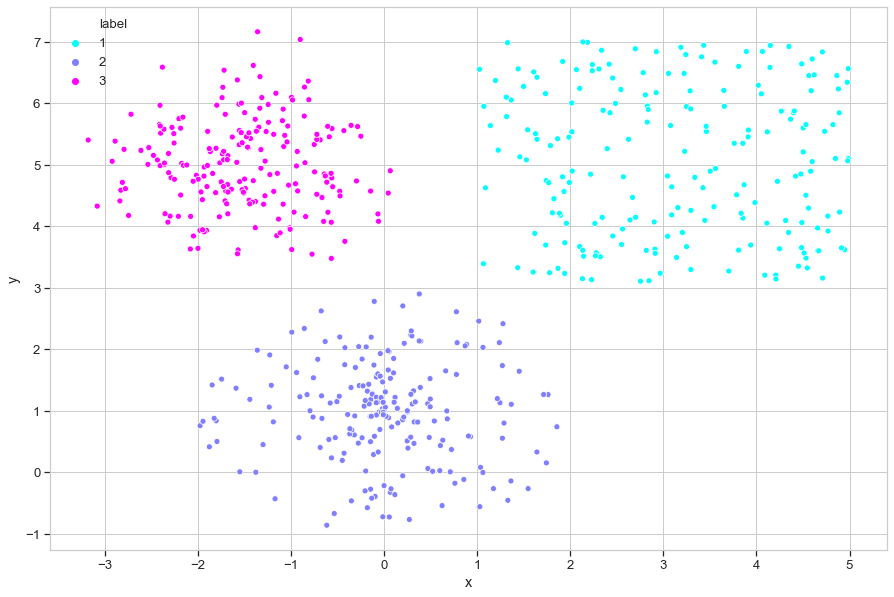

In [10]:
sns.scatterplot(data=df3, x="x", y="y", hue="label", legend="full", palette="cool")
plt.show()

---

## Eksport danych do plików

Zbiory autorskie zostaną zapisane do katalogu o nazwie `myOwn`

In [11]:
dataset_directory = "pd4-zbiory-benchmarkowe"
data_suffix = ".data.gz"
label_suffix = ".labels0.gz"
myOwnDirectory = "myOwn"

In [12]:
my_set = dict()
my_set["3hearts"] = df1
my_set["sinAndCos"] = df2
my_set["3distr"] = df3

In [13]:
path_for_myOwn = os.path.join(dataset_directory, myOwnDirectory)
if not os.path.exists(path_for_myOwn):
    os.makedirs(path_for_myOwn)

for key, value in my_set.items():
    file_name = os.path.join(path_for_myOwn, key)
    np.savetxt(file_name + data_suffix ,value.loc[:, ["x", "y"]].values)
    np.savetxt(file_name + label_suffix, value.loc[:, "label"].values)
    